# Model Comparisions

# Dependencies

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler, minmax_scale, MaxAbsScaler, Normalizer, QuantileTransformer, PowerTransformer
from sklearn.linear_model import LogisticRegression

# Support vector machine linear classifier
from sklearn.svm import SVC
import joblib

from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

import warnings
warnings.simplefilter('ignore', FutureWarning)

//anaconda3/envs/PythonWebMongo/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
//anaconda3/envs/PythonWebMongo/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
//anaconda3/envs/PythonWebMongo/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
//anaconda3/envs/PythonWebMongo/lib/python3.6/site-pack

# Functions

In [2]:
# Define a decode function for encoding/decoding y labels
def decode(datum):
    return np.argmax(datum)

def decodeResults(encoded_predictions):
    labeled_predictions =[]
    for i in range(encoded_predictions.shape[0]):
        decoded_datum = decode(encoded_predictions[i])
        labeled_predictions.append(decoded_datum)
    return labeled_predictions

def reshapeResults(predictions):
    return predictions.reshape(-1,1)

def convertToBinary(predictions):
    binary = []
    for prediction in predictions:
        if (prediction == 'buff'):
            binary.append(0)
        else:
            binary.append(1)
    return binary

In [3]:
# function to create scatterplot
def scatterPlot(df, title, xlabel, ylabel):

    # Scatter Plot of Data
    df.plot(figsize=(18,5))
    ax=plt.subplot(1,1,1)
    
    SMALL_SIZE = 16
    MEDIUM_SIZE = 18
    BIGGER_SIZE = 24

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE,)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

    ax.legend(bbox_to_anchor=(1,1.03), prop={"weight":'normal'})
    
    plt.title(title, weight='bold')
    plt.xlabel(xlabel, weight='bold')
    plt.ylabel(ylabel, weight='bold')
    
    return

In [4]:
# Dynamic function comparing populations on a boxplot
def boxPlotCompare(populations, labels, title, y_label):
    
    meanpointprops = dict(marker='D', markeredgecolor='black',
                      markerfacecolor='firebrick',markersize=12)
    
    # Set the figure size
    fig = plt.figure(figsize=(20,8))
    axBox = fig.add_subplot()
    
    # Show box plots of the data
    plt.boxplot(populations,showmeans=True, meanprops=meanpointprops)
    
    SMALL_SIZE = 16
    MEDIUM_SIZE = 18
    BIGGER_SIZE = 24

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE,)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
    
    plt.title(title, weight='bold')
    length=len(labels)
    
    xTicks=np.arange(1,length+1, 1)
    plt.xticks(xTicks, labels)
    
    plt.xlabel("Model", weight='bold')
    plt.ylabel(y_label, weight='bold')
    plt.show()
 
    return

In [5]:
# Function to loop through results displaying a boxplot and ANOVA for each parameter of interest
def displayAllResults():

    # Loop through the metrics
    for key in metrics:
        
        displayResults(key)
    
    return 

In [6]:
# Function to display results
def displayResults(metric):
    
     # Establish the populations
    population = []
    for model in labels:
        population.append(model_results[model][metric])

    # Run ANOVA
    print('\033[1m' + metrics[metric] + 'ANOVA test' + '\033[0m')
    print(stats.f_oneway(population[0], population[1], population[2], population[3], 
                         population[4], population[5], population[6]))

    # Create BoxPlot
    boxPlotCompare(population, labels, metrics[metric], metric)
    
    # Create a Scatterplot
    df = pd.DataFrame(list(zip(population[0], population[1], population[2], population[3], 
                         population[4], population[5], population[6])), columns = labels)
    scatterPlot(df, metrics[metric], 'Iteration', metric)
    
    return

In [7]:
# Function to generate stats on results
def runStats(population,labels):
    
    # Perform an ANOVA test assuming populations are not equal
    print('\033[1m' + '\nANOVA test' + '\033[0m')
    print(labels)
    print(stats.f_oneway(population[1], population[2]))
    
    return

In [8]:
#  Function to split and encode the data
def splitData (X, y, iteration):
    
    X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=iteration)
    
    # Apply the MinMax Scaler
    X_scaler = MinMaxScaler().fit(X_train)
    X_train_scaled = X_scaler.transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)
    
    # Label encode the dependent variable, then Hot encode it
    label_encoder = LabelEncoder()
    label_encoder.fit(y_train)
    y_train_encoded = label_encoder.transform(y_train)
    y_test_encoded = label_encoder.transform(y_test)
    y_train_one_hot = to_categorical(y_train_encoded)
    y_test_one_hot = to_categorical(y_test_encoded)

    return X_train_scaled, X_test_scaled, X_test, y_train_one_hot, y_test_one_hot, y_test, y_test_encoded

In [9]:
# Function to return score of each model
def scoreModels(X_test_scaled, X_test, y_test_one_hot, y_test, y_test_encoded):

    NN_loss, NN_score = NN.evaluate(X_test_scaled, y_test_one_hot)
#     print(f' score {NN_score}')

    LR_score = LR.score(X_test_scaled, y_test_encoded)
#     print(f" score {LR_score}")

    SVM_score = SVM.score(X_test_scaled, y_test_encoded)
#     print(f" score {SVM_score}")

    KNN_score = KNN.score(X_test_scaled, y_test_one_hot)
#     print(f" score {KNN_score}")

    RF_score = RF.score(X_test, y_test)
#     print(f" score {RF_score}")
    
    return NN_score, LR_score, SVM_score, KNN_score, RF_score


In [10]:
# Function to collect predictions from models
def runPredictions(X_test_scaled):
    
    # Random Forests
    RF_predict = RF.predict(X_test_scaled)
    
    # K Nearest Neighbor
    KNN_predict = KNN.predict(X_test_scaled)
    
    # Support Vector Machines
    SVM_predict = SVM.predict(X_test_scaled)
    
    # Logistic Regression
    LR_predict = LR.predict(X_test_scaled)
    
    # Neural Network
    NN_predict = NN.predict(X_test_scaled)
    
    # Need to convert from buff and sick to 1 and 0
    RF_prediction = convertToBinary(RF_predict)

    # Need to decode results
    KNN_prediction = decodeResults(KNN_predict)
    NN_prediction = decodeResults(NN_predict)
    
    return RF_prediction, KNN_prediction, NN_prediction, SVM_predict, LR_predict

# Run the code!!!

## Load data

In [11]:
df = pd.read_csv('../ETL/cleveland_clean.csv')
df.head()

,age,sex,chestPain,trestBps,cholesterol,bloodSugar,ecg,maxHeartRate,exerciseInducedAngina,oldPeak,slope,vesselsColored,thal,buff
0,63.0,male,angina,145.0,233.0,true,hyp,150.0,fal,2.3,down,0.0,fix,buff
1,67.0,male,asympt,160.0,286.0,fal,hyp,108.0,true,1.5,flat,3.0,norm,sick
2,67.0,male,asympt,120.0,229.0,fal,hyp,129.0,true,2.6,flat,2.0,rev,sick
3,37.0,male,notang,130.0,250.0,fal,norm,187.0,fal,3.5,down,0.0,norm,buff
4,41.0,fem,abnang,130.0,204.0,fal,hyp,172.0,fal,1.4,up,0.0,norm,buff


In [12]:
#  reformat the data to replicate data used to create models
X = df.drop('buff', axis =1)
y = df['buff']
X['vesselsColored']=X['vesselsColored'].astype(str)
X=pd.get_dummies(X)

## Create Result Dictionary

In [13]:
labels=['SVM', 'LR', 'RF', 'KNN', 'NN', 'Majority Vote', 'Conservative Votes']
metrics = {'TP':'True Positive Predictions', 'TN':'True Negative Predictions','FP':'False Positive Predictions',
           'FN':'False Negative Predictions', 'Accuracy':'Model Accuracy = (TP + TN) / observations', 
           'Precision':'Model Precision = TP / (TP + FP)', 'Recall':'Model Recall = TP / (TP + FN)', 
           'F1 Score':'F1 Score = 2 * ((precision * recall)/(precision + recall))'} #, 'SKL Accuracy':'SciKit-Learn Model Score'}

model_results = {}
for model in labels:
    model_results[model] = {'TP':[], 'TN':[], 'FP':[], 'FN':[],
                'Accuracy':[], 'Precision':[],'Recall':[], 'F1 Score':[]}

# Load Models

In [14]:

# Random Forests
RF = joblib.load('tree.sav')

# K Nearest Neighbors
KNN = joblib.load('KNN.sav')

# Support Vector Machines
SVM = joblib.load('SVM.sav')

# Logistic Regression
LR = joblib.load('LR.sav')

# Neural Network
NN = load_model("NeuralNetwork.h5")


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


# Loop to iterate different splits of data

In [15]:
loops = 50
scoresDF=pd.DataFrame(columns = ['Neural Network', 'Logistic Regression', 'SVM', 'KNN', 'Random Forest'])

# results=pd.DataFrame();
majority_vote=[];
conservative_vote=[];

for i in range(1,loops+1,1):
    #split the data
    X_train_scaled, X_test_scaled, X_test, y_train_one_hot, y_test_one_hot, y_test, y_test_encoded=splitData(X,y,i)
    
    #collect score of each model
    NN_score, LR_score, SVM_score, KNN_score, RF_score=scoreModels(X_test_scaled, X_test, y_test_one_hot, y_test, y_test_encoded)
    
    loopScores=pd.Series([NN_score, LR_score, SVM_score, KNN_score, RF_score], index=scoresDF.columns)
    scoresDF=scoresDF.append(loopScores, ignore_index=True)
    
    #collect predictions for each model
    RF_prediction, KNN_prediction, NN_prediction, SVM_predict, LR_predict=runPredictions(X_test_scaled)
    
    #Create a new column to hold the iteration number of the data
    iteration=[]
    for x in y_test:
        iteration.append(i) 
        
        
    #Calculate majority and conservative vote across each model
    sum_result=(SVM_predict+LR_predict+RF_prediction+KNN_prediction+NN_prediction)
    majority_vote=np.where(sum_result >= 3, 1, 0)
    conservative_vote=np.where(sum_result > 0, 1, 0)

    predictions = {'SVM':SVM_predict, 'LR':LR_predict, 'RF':RF_prediction, 'KNN':KNN_prediction, 
                   'NN':NN_prediction, 'Majority Vote':majority_vote, 'Conservative Votes':conservative_vote}
    
    #Determine number of false positives, negatives, and correct predictions
    for model in labels:
        predict = predictions[model]
        calc = (y_test_encoded * 10) + (predict - y_test_encoded)
        
        #Calculate a means to determine TP, TN, FP, FN
        # TP = 10, TN = 0, FP = 1, FN = 9
        model_results[model]['TP'].append(np.count_nonzero(calc == 10))
        model_results[model]['TN'].append(np.count_nonzero(calc == 0))
        model_results[model]['FP'].append(np.count_nonzero(calc == 1))
        model_results[model]['FN'].append(np.count_nonzero(calc == 9))
    

74/74 [==============================] - 0s 73us/sample - loss: 0.1920 - acc: 0.9459



ANOVA test
['Neural Network', 'Logistic Regression', 'SVM', 'KNN', 'Random Forest']
F_onewayResult(statistic=0.005278750336655146, pvalue=0.9422287315013544)


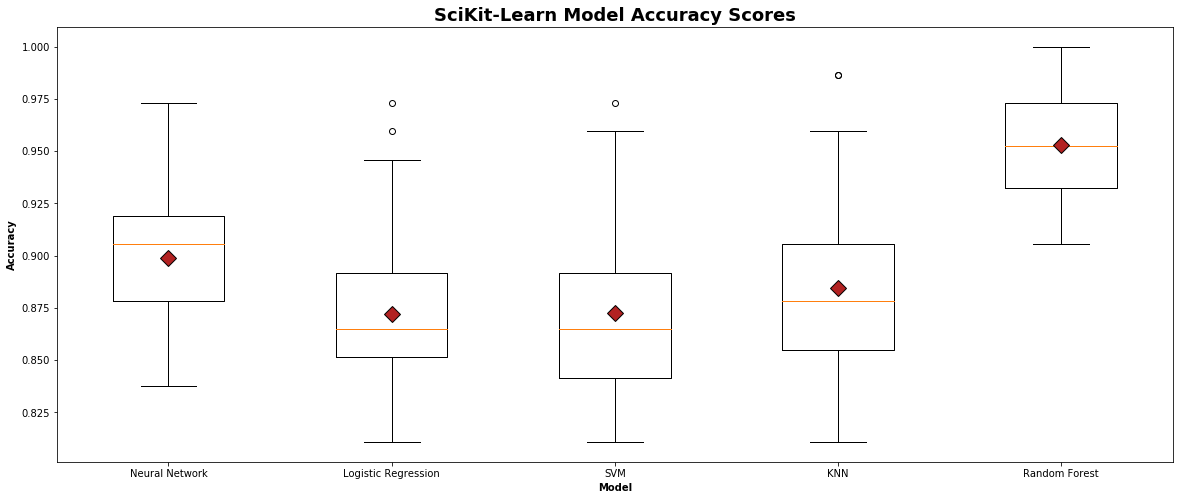

In [16]:
pop = [scoresDF['Neural Network'], scoresDF['Logistic Regression'], scoresDF['SVM'], scoresDF['KNN'], scoresDF['Random Forest']]
lbls = ['Neural Network', 'Logistic Regression', 'SVM', 'KNN', 'Random Forest']
runStats(pop,lbls)
boxPlotCompare(pop, lbls, 'SciKit-Learn Model Accuracy Scores', 'Accuracy')

/Applications/anaconda3/envs/PythonWebMongo/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


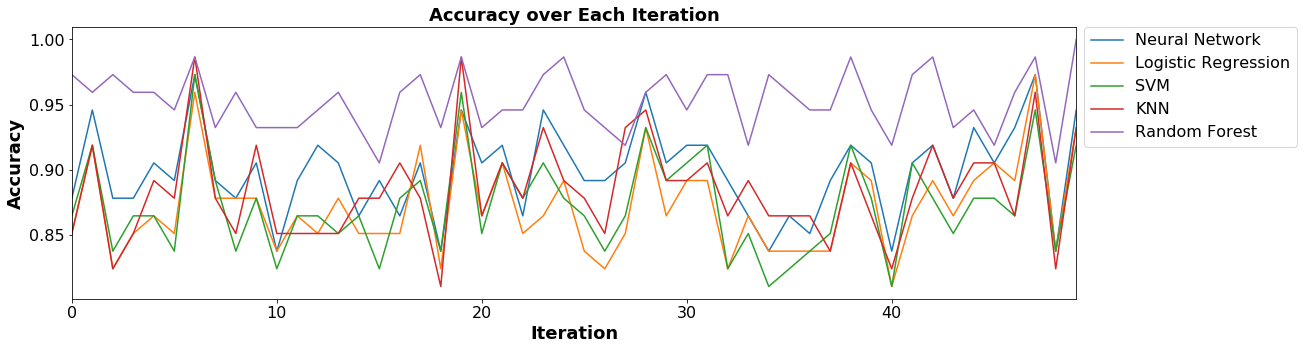

In [17]:
title='Accuracy over Each Iteration'
xlabel='Iteration'
ylabel='Accuracy'


scatterPlot(scoresDF, title, xlabel, ylabel)

False Positive PredictionsANOVA test
F_onewayResult(statistic=49.49655647382921, pvalue=1.1467662793486244e-43)


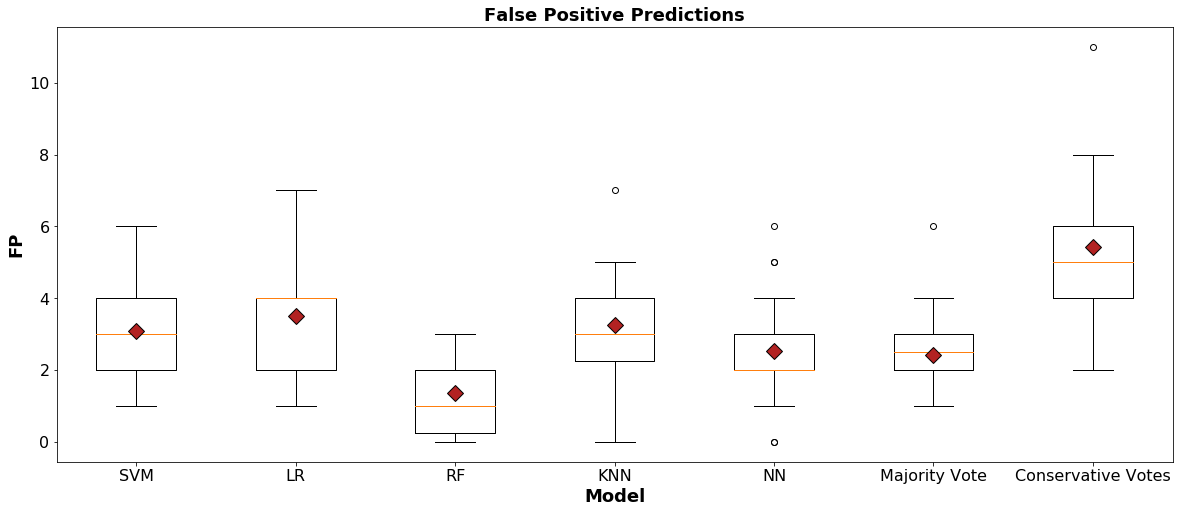

/Applications/anaconda3/envs/PythonWebMongo/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


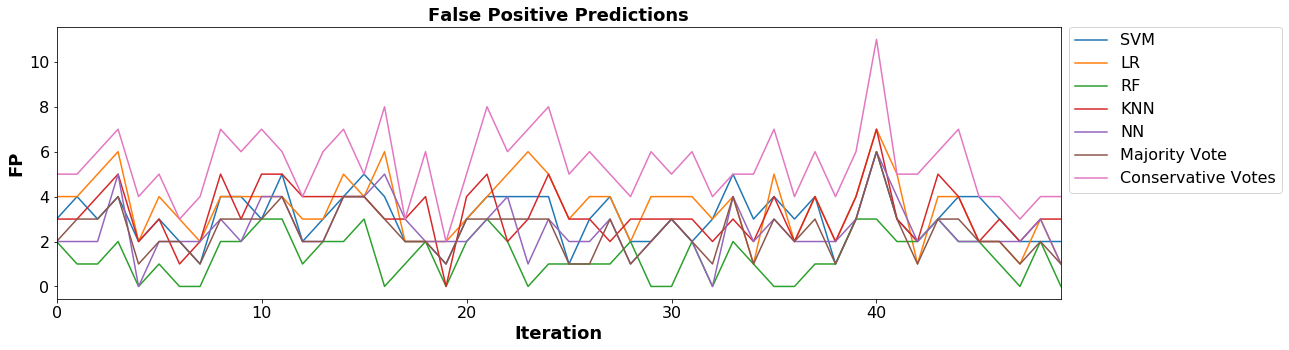

In [18]:
displayResults('FP')

False Negative PredictionsANOVA test
F_onewayResult(statistic=15.84407206940016, pvalue=4.419315450723623e-16)


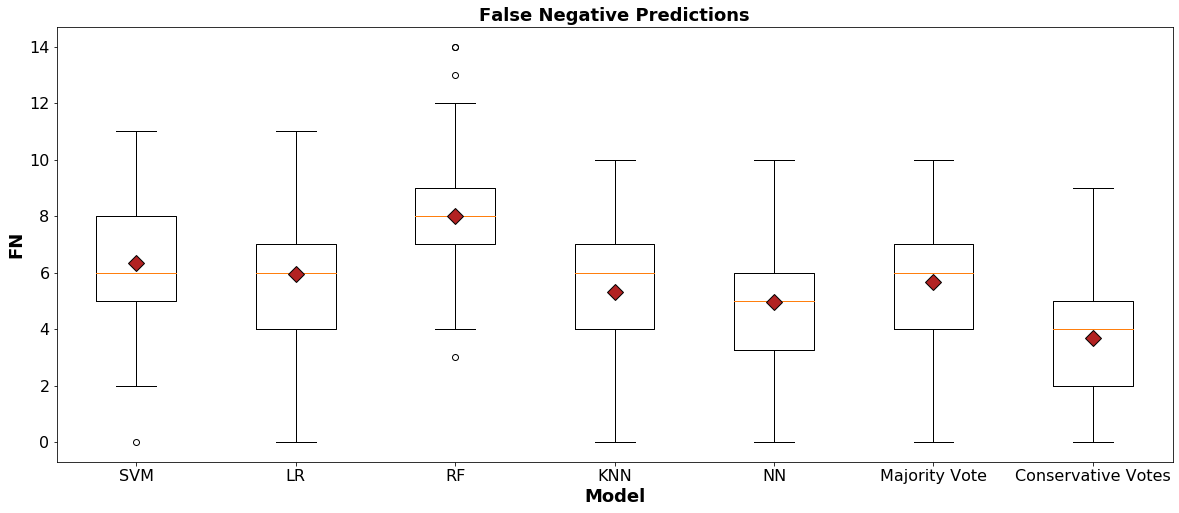

/Applications/anaconda3/envs/PythonWebMongo/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


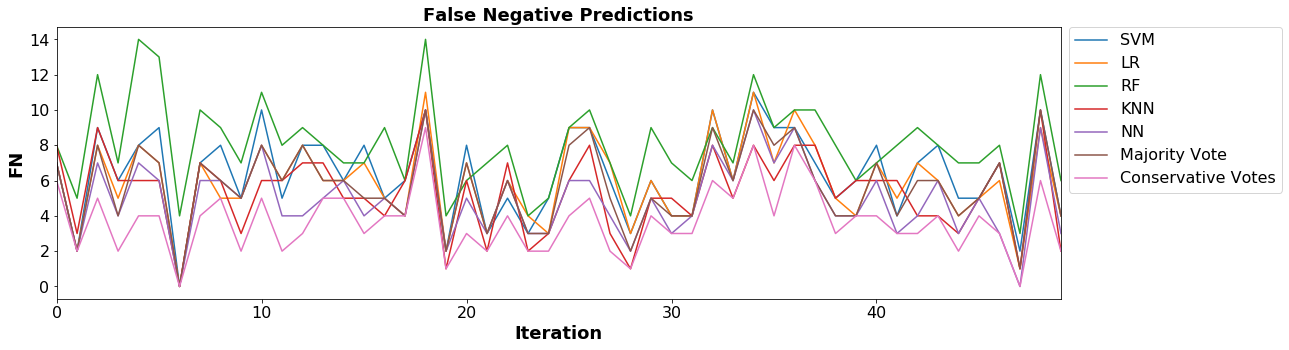

In [19]:
displayResults('FN')

True Positive PredictionsANOVA test
F_onewayResult(statistic=5.4785228213336055, pvalue=1.971403060789163e-05)


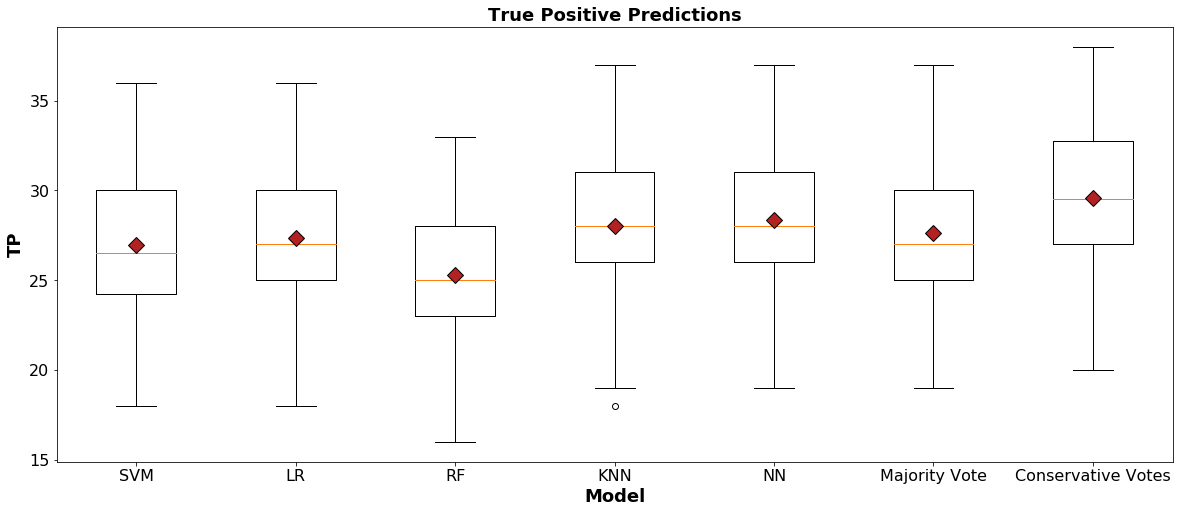

/Applications/anaconda3/envs/PythonWebMongo/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


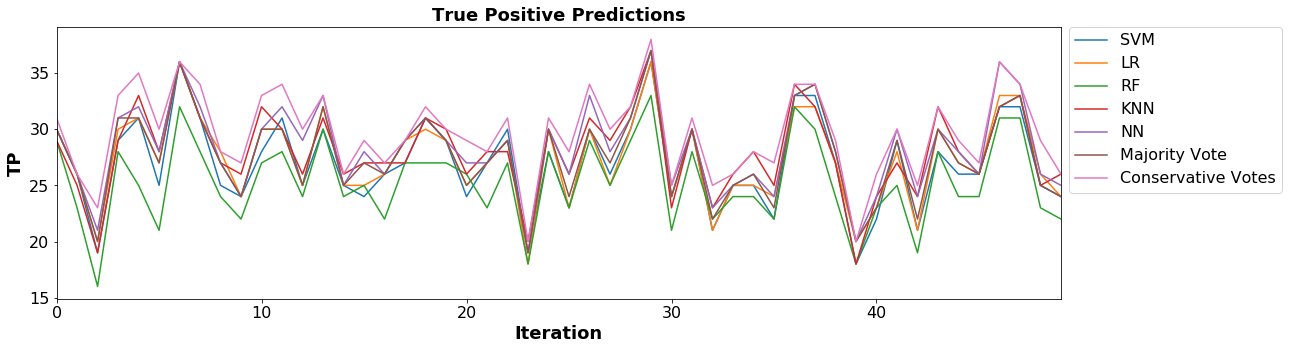

In [20]:
displayResults('TP')

True Negative PredictionsANOVA test
F_onewayResult(statistic=4.191323600319506, pvalue=0.00043905551961790284)


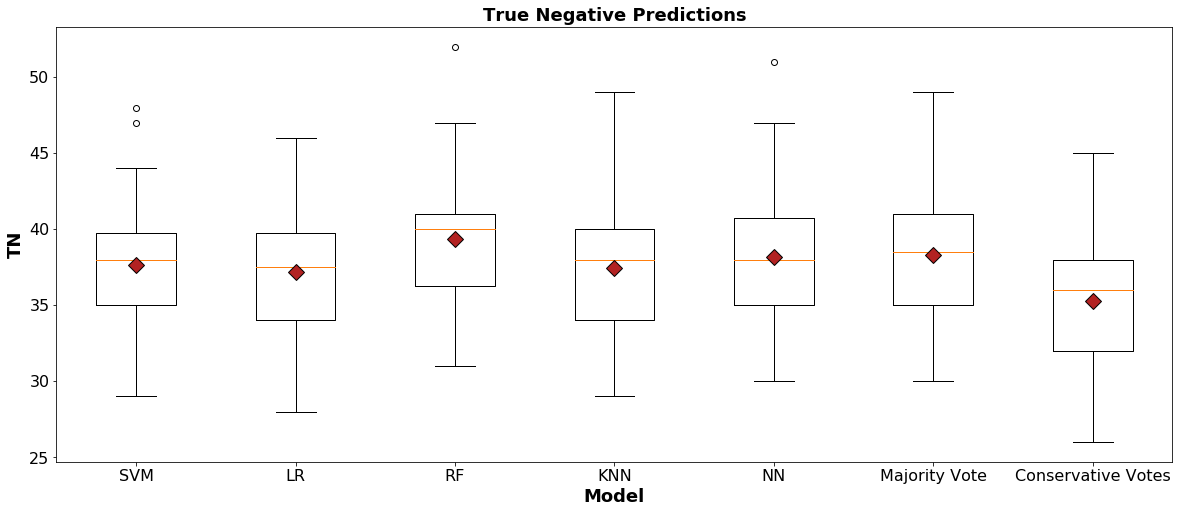

/Applications/anaconda3/envs/PythonWebMongo/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


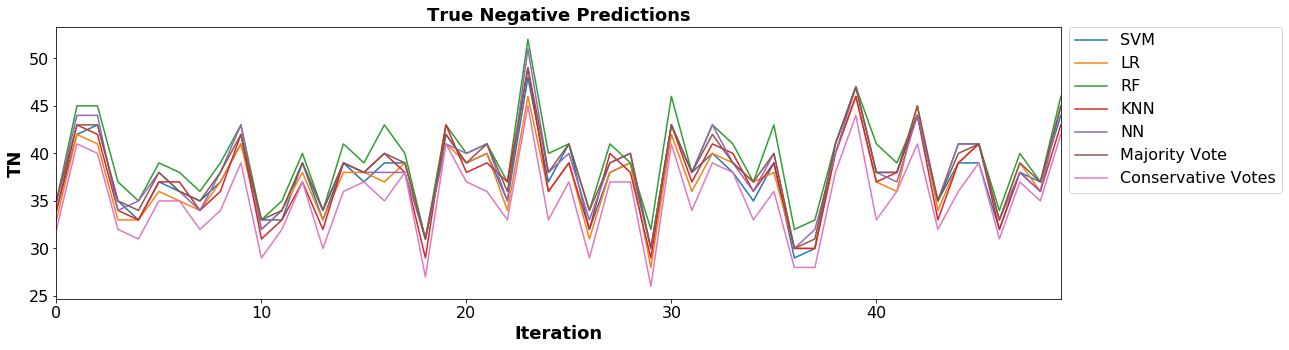

In [21]:
displayResults('TN')

# Confusion Matrix
#### Definitions
* True Positive (TP): The predicted class and the actual class are the same. Both predicted Heart Disease.
* True Negative (TN): The predicted class and the actual class are the same. Both predicted No Heart Disease.
* False Negative (FN): The actual class was Cancer, but the prediction was No Heart Disease.
* False Positive (FP): The actual class was No Cancer, but the prediction was Heart Disease.

#### Formulas
* Accuracy = (TP + TN) / all observations
* Precision = TP / (TP + FP)
* Recall = TP / (TP + FN)
* F1 Score = 2 * ((precision * recall) / (precision + recall))



In [22]:
runs = len(model_results[model]['TP'])

for x in range(0, runs):
    
    observations = model_results['SVM']['TP'][x] + model_results['SVM']['TN'][x] + model_results['SVM']['FP'][x] + model_results['SVM']['FN'][x]
    
    for model in labels:
        
        # Accuracy = (TP + TN) / all observations
        model_results[model]['Accuracy'].append((model_results[model]['TP'][x] + model_results[model]['TN'][x]) / observations)
        
        # Precision = TP / (TP + FP)
        model_results[model]['Precision'].append(model_results[model]['TP'][x] / (model_results[model]['TP'][x] + model_results[model]['FP'][x]))
        
        # Recall = TP / (TP + FN)
        model_results[model]['Recall'].append(model_results[model]['TP'][x] / (model_results[model]['TP'][x] + model_results[model]['FN'][x]))
        
        # F1 Score = 2 * ((precision * recall) / (precision + recall))
        model_results[model]['F1 Score'].append(2 * ((model_results[model]['Precision'][x] * model_results[model]['Recall'][x]) / (model_results[model]['Precision'][x] + model_results[model]['Recall'][x])))
    

Model Accuracy = (TP + TN) / observationsANOVA test
F_onewayResult(statistic=4.02502111911179, pvalue=0.0006526207083656218)


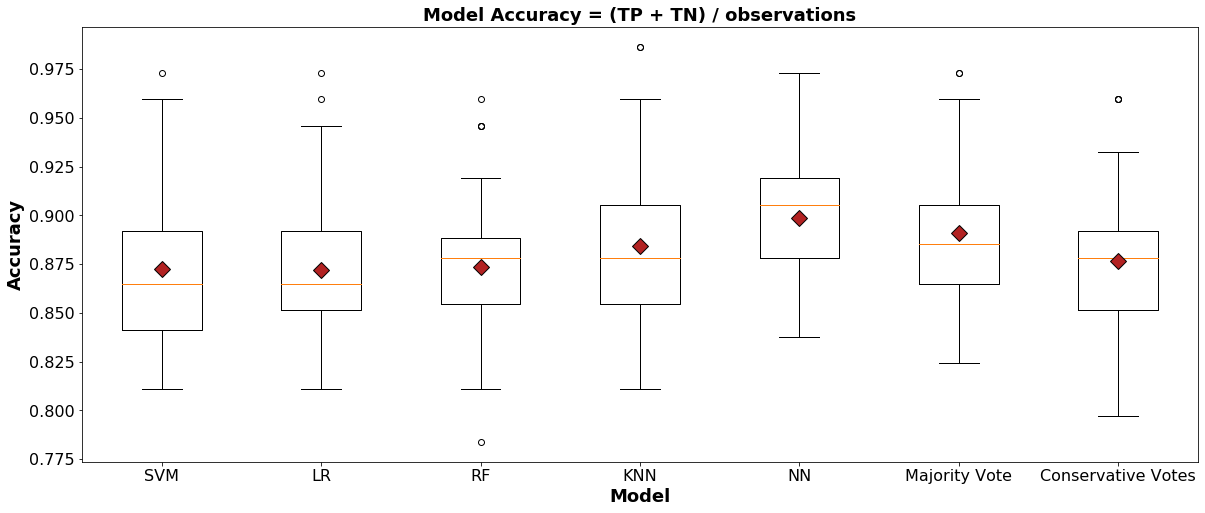

/Applications/anaconda3/envs/PythonWebMongo/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


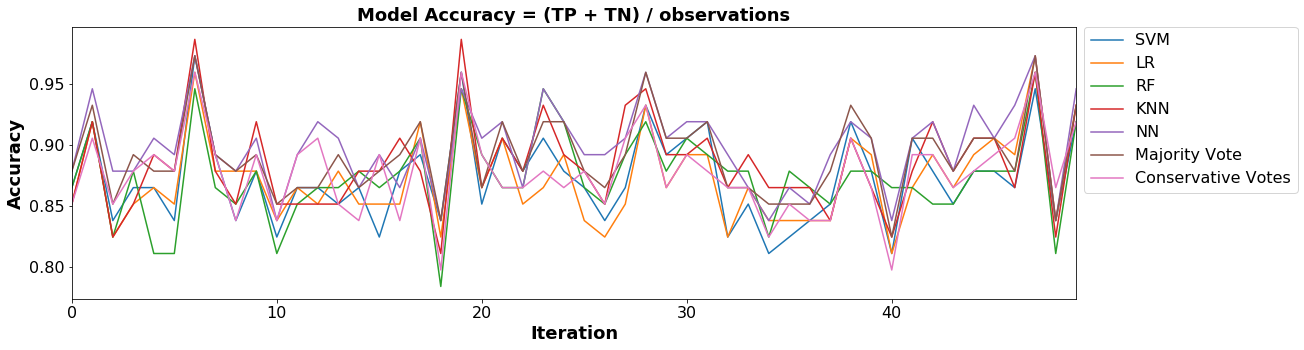

In [23]:
displayResults('Accuracy')

Model Precision = TP / (TP + FP)ANOVA test
F_onewayResult(statistic=30.90310174180485, pvalue=1.2215718681289804e-29)


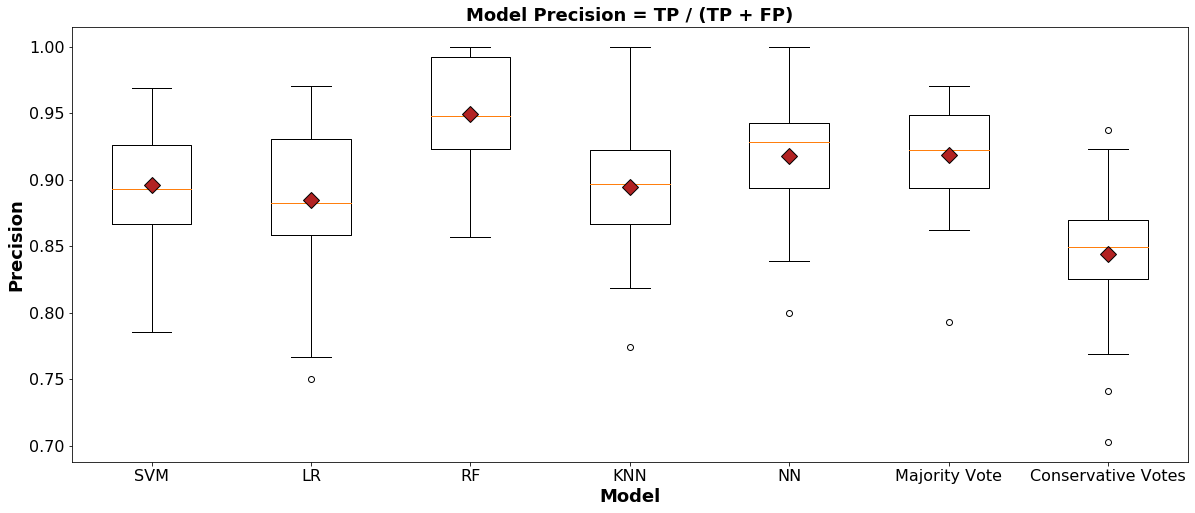

/Applications/anaconda3/envs/PythonWebMongo/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


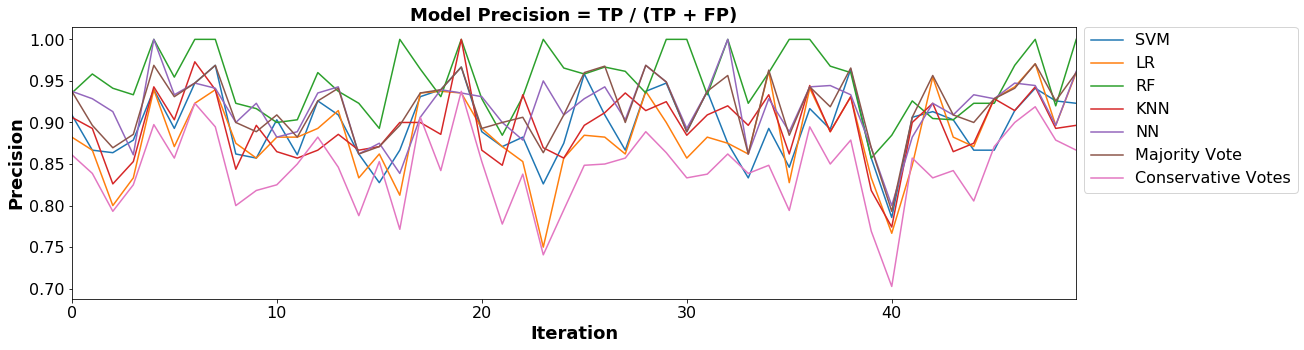

In [24]:
displayResults('Precision')

Model Recall = TP / (TP + FN)ANOVA test
F_onewayResult(statistic=19.117508545377767, pvalue=3.1666344061776333e-19)


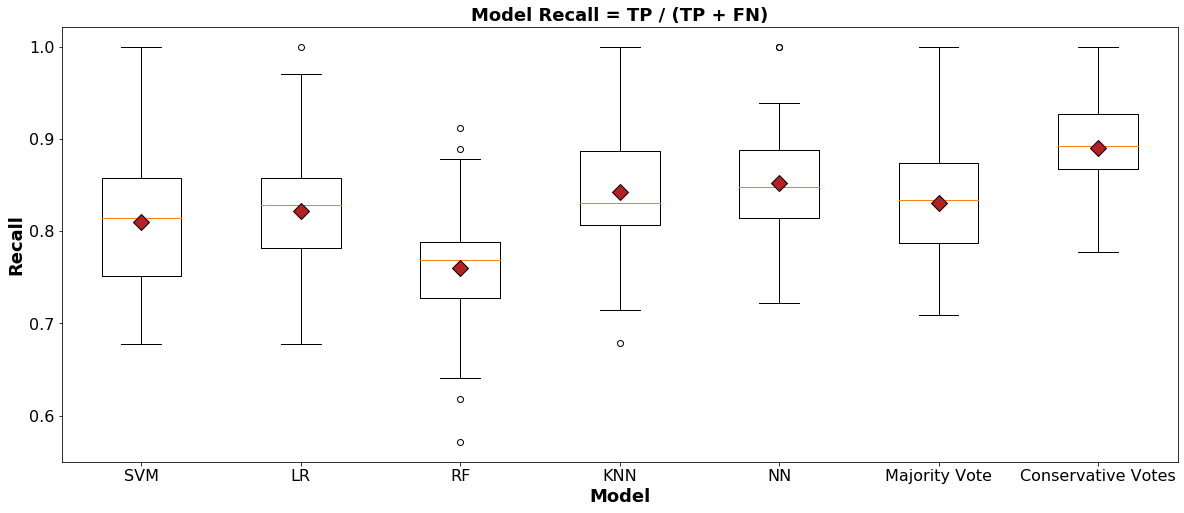

/Applications/anaconda3/envs/PythonWebMongo/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


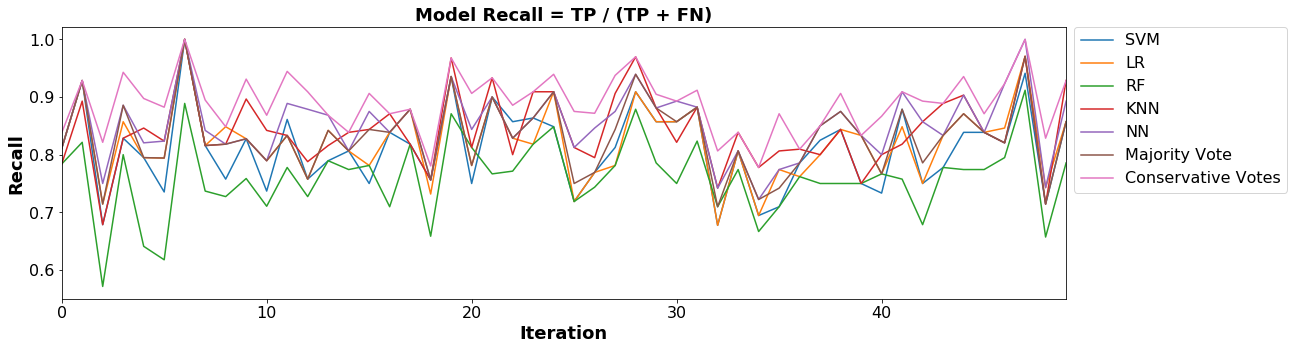

In [25]:
displayResults('Recall')

F1 Score = 2 * ((precision * recall)/(precision + recall))ANOVA test
F_onewayResult(statistic=5.102722060279824, pvalue=4.90083199362881e-05)


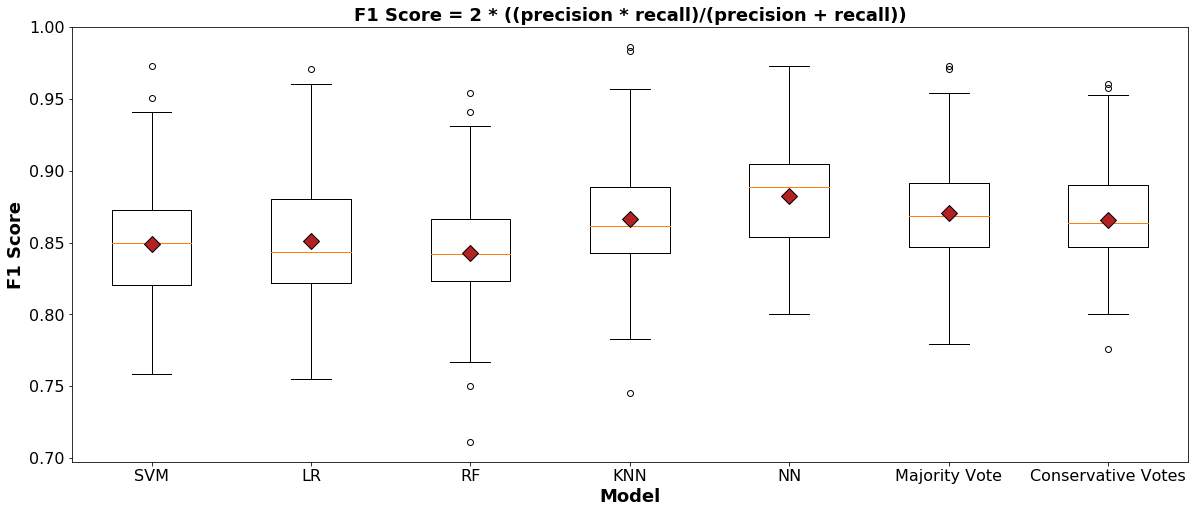

/Applications/anaconda3/envs/PythonWebMongo/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


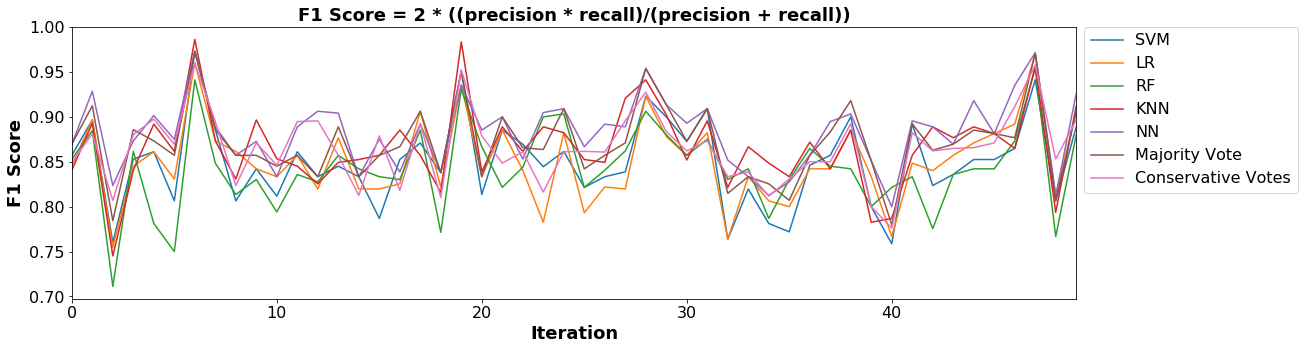

In [26]:
displayResults('F1 Score')